A/B testing lets you compare scenarios to see which best achieves some goal.

Print the late_shipments dataset.

In [ ]:
# Print the late_shipments dataset
print(late_shipments)

Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".

In [ ]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

Hypothesize that the proportion of late shipments is 6%.

Calculate the standard error from the standard deviation of the bootstrap distribution.

Calculate the z-score.

In [ ]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

p-values

Calculate the z-score of late_prop_samp.

Calculate the p-value for the z-score, using a right-tailed test.

In [ ]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score)
                 
# Print the p-value
print(p_value) 

Calculating a confidence interval

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.

In [ ]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

Hypothesis testing workflow

You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

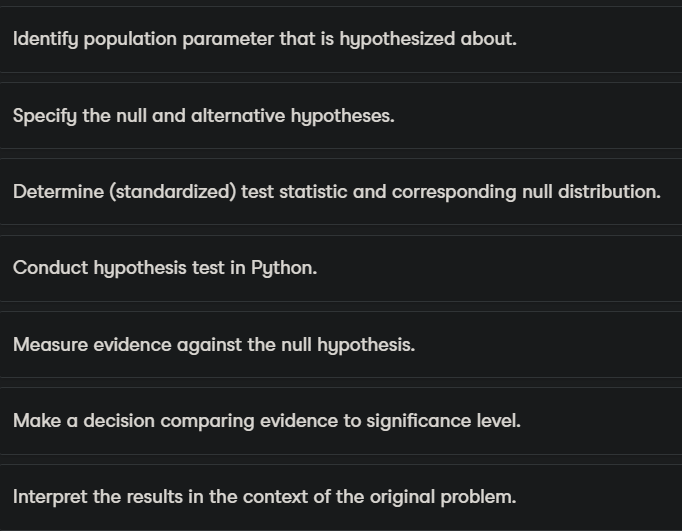

Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.
 
 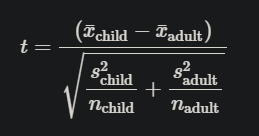
 
While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

Instructions

Calculate the numerator of the 
 test statistic.

Calculate the denominator of the 
 test statistic.
 
Use those two numbers to calculate the 
 test statistic.

In [ ]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

From t to p

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

Calculate the degrees of freedom for the test.

Compute the p-value using the test statistic, t_stat.

In [ ]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.

Visualizing the difference


Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

Instructions 1/4

Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.



In [ ]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

Calculate the mean of the diff column as xbar_diff.

In [ ]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

Calculate the standard deviation of the diff column as s_diff.

In [ ]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

Plot a histogram of the diff column with 20 bins.

In [ ]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

Using ttest()

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

: The proportion of democratic votes in 2012 and 2016 were the same. 

: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

Instructions 1/4

Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".

In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")
                              
# Print the test results
print(test_results)

What's the correct decision from the t-test, assuming 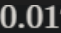?


Reject the null hypothesis.

Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.

In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")
                              
# Print the paired test results
print(paired_test_results)

Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?

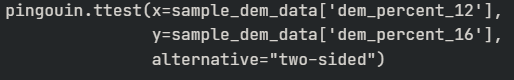

Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

AOVA Tests - A test for differences between groups

Visualizing many categories

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

Instructions 1/3

Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode.

In [ ]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

Group late_shipments by shipment_mode and calculate the standard deviation pack_price for each group, storing the result in s_pack_by_mode.

In [ ]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y.

In [ ]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data=late_shipments)
plt.show()

Conducting an ANOVA test

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

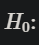: Pack prices for every category of shipment mode are the same.

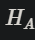: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

Instructions 1/2

Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) between the groups of 'shipment_mode'.

In [ ]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                               dv="pack_price",
                               between="shipment_mode")

# Print anova_results
print(anova_results)

Question

Assuming a significance level of 0.1, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?


Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.

Pairwise t-tests

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

Instructions 1/3

Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.

In [ ]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="none")

# Print pairwise_results
print(pairwise_results)

Modify the pairwise t-tests to use the Bonferroni p-value adjustment.

In [ ]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

Question

Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?


After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.